In [30]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [32]:
import chardet

In [34]:
with open('/content/global_warming (1).csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [35]:
df = pd.read_csv('/content/global_warming (1).csv', encoding=encoding)

In [36]:
df.head()

,tweet,existence
0,Global warming report urges governments to act...,1
1,Fighting poverty and global warming in Africa ...,1
2,Carbon offsets: How a Vatican forest failed to...,1
3,Carbon offsets: How a Vatican forest failed to...,1
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,1


In [37]:
# two string variables for comparison
string1 = 'climate'
string2 = 'climb'

In [38]:
# normal function example
def my_normal_function(x):
    return x**2 + 10
# lambda function example
my_lambda_function = lambda x: x**2 + 10

In [40]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

573

In [41]:
df.columns


Index(['tweet', 'existence', 'is_retweet'], dtype='object')

In [42]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

504

In [43]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
3204,Take Action @change: Help Protect Wildlife Hab...,14
2829,RT @newtgingrich: Historic snow storm in washi...,9
1250,Fight Climate Change From All Fronts: [link],8
1163,Earth's polar ice sheets vulnerable to even mo...,7
1364,Global Warming Dent's El Ni'o's Protective Shi...,7
765,Carbon offsets: How a Vatican forest failed to...,6
978,Coalition of the Tired of Waiting: Fighting Cl...,6
711,CLIMATE CHANGE: Forests Not for Absorbing Carb...,5
2587,RT @Newsweek: Global Warming Kills Forests In ...,5
2588,RT @Newsweek: Global Warming Kills Forests In ...,5


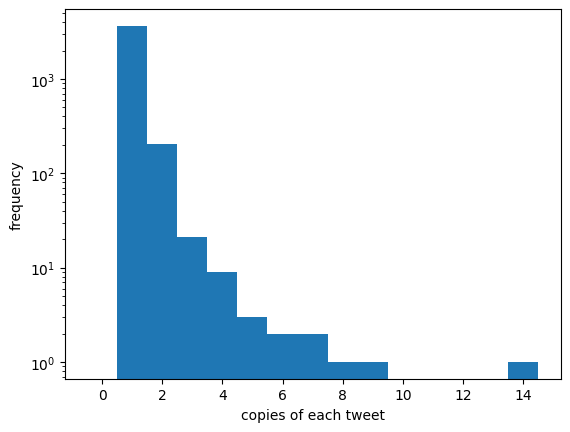

In [45]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()

In [46]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [49]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

In [50]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [51]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [52]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [53]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

388

In [54]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

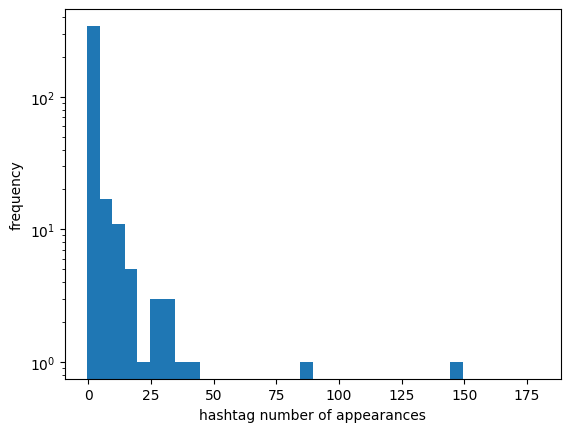

In [70]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()

In [56]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [57]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [58]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [72]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

In [74]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

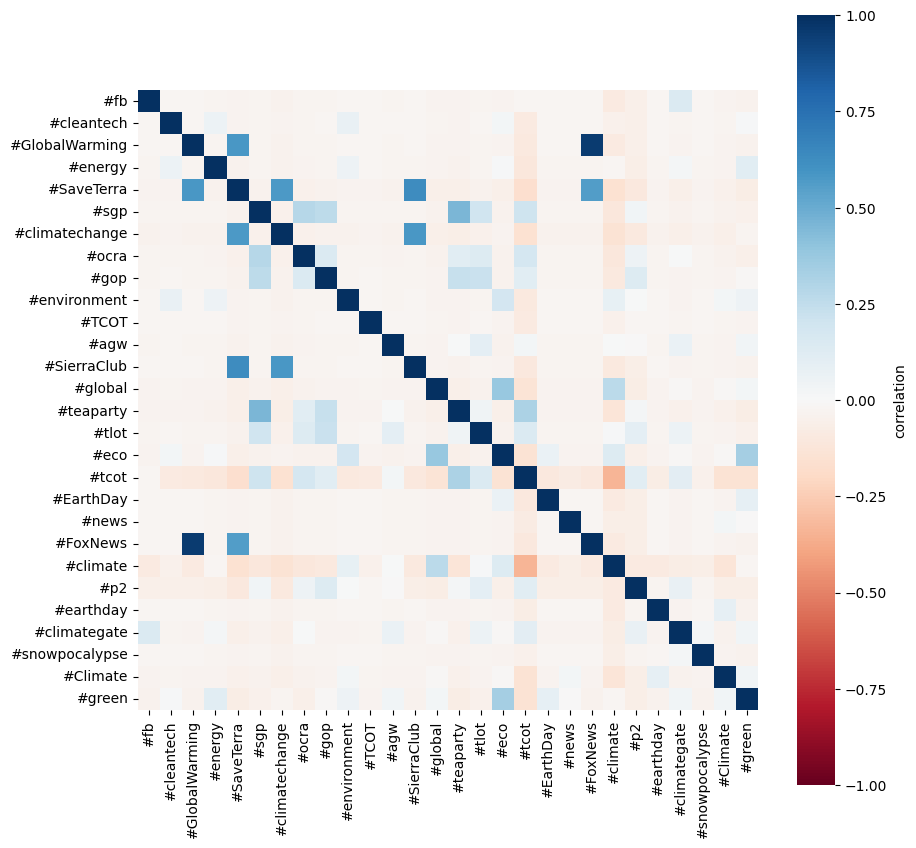

In [76]:


# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [77]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [78]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [82]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [83]:
import nltk.corpus

In [84]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [85]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names_out()


In [90]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [91]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [92]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [93]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,chang,295.3,climat,378.1,global,1210.3,global,284.3,climat,861.9,chang,250.9,chang,183.0,warm,594.6,global,383.4,climat,329.9
1,climat,219.8,chang,364.4,warm,1203.8,warm,275.7,chang,805.2,climat,243.3,climat,178.0,global,586.8,warm,357.2,chang,307.7
2,#climate,152.0,fight,85.7,caus,93.0,could,101.7,via,147.7,#p,44.3,world,134.8,snow,184.8,day,102.1,news,150.1
3,take,67.9,energi,78.6,scientist,88.2,mean,67.8,new,94.7,video,42.4,peopl,101.7,#tcot,171.7,à,84.2,via,113.3
4,action,65.1,need,67.1,say,84.7,volcano,60.0,report,75.3,glacier,41.1,right,70.1,gore,117.1,effect,80.3,un,57.1
5,help,61.6,bill,55.4,blame,58.3,iceland,54.1,nation,59.9,rt,34.6,confer,56.1,dc,106.4,earth,71.9,issu,47.0
6,make,46.9,state,53.5,still,55.6,air,51.0,impact,58.2,weather,33.9,claim,46.9,al,103.1,call,65.5,new,46.5
7,wildlif,44.1,legisl,51.1,stop,54.2,cold,49.1,scienc,54.9,obama,33.9,earth,37.1,blizzard,85.5,one,60.0,expert,46.1
8,protect,44.1,see,49.9,believ,52.4,california,43.1,agenc,51.1,conserv,32.8,bolivia,35.1,like,76.9,plant,51.1,heat,42.1
9,bird,40.1,tell,49.7,scienc,50.9,snow,40.7,studi,46.1,think,31.9,mother,34.1,make,74.7,way,44.4,water,42.1
